In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r"C:\Users\manir\OneDrive\Desktop\Datasets\ElectricCarData_Norm.csv"
data=pd.read_csv(path)
data.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


# Data Preprocessing

In [3]:
data.shape

(103, 14)

In [4]:
data.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [6]:
data.columns.tolist()

['Brand',
 'Model',
 'Accel',
 'TopSpeed',
 'Range',
 'Efficiency',
 'FastCharge',
 'RapidCharge',
 'PowerTrain',
 'PlugType',
 'BodyStyle',
 'Segment',
 'Seats',
 'PriceEuro']

In [7]:
df=data.drop(['Brand','Model'],axis=1)

In [8]:
df[['FastCharge','TopSpeed','Range','Efficiency','Accel']] = df[['FastCharge','TopSpeed','Range','Efficiency','Accel']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)

In [9]:
df['FastCharge']=df['FastCharge'].str.replace('-','0')

In [10]:
df.head()

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,450,161,940,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Accel        103 non-null    object
 1   TopSpeed     103 non-null    object
 2   Range        103 non-null    object
 3   Efficiency   103 non-null    object
 4   FastCharge   103 non-null    object
 5   RapidCharge  103 non-null    object
 6   PowerTrain   103 non-null    object
 7   PlugType     103 non-null    object
 8   BodyStyle    103 non-null    object
 9   Segment      103 non-null    object
 10  Seats        103 non-null    int64 
 11  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 9.8+ KB


In [12]:
df['FastCharge']=df['FastCharge'].astype(float)


In [13]:
mean_Fastcharge=df['FastCharge'].mean()
mean_Fastcharge

434.56310679611653

In [14]:
df['FastCharge']=df['FastCharge'].replace(0,mean_Fastcharge)

In [15]:
df['Efficiency']=df['Efficiency'].astype(float)
df['Accel']=df['Accel'].astype(float)
df['TopSpeed']=df['TopSpeed'].astype(int)
df['Range']=df['Range'].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Accel        103 non-null    float64
 1   TopSpeed     103 non-null    int32  
 2   Range        103 non-null    float64
 3   Efficiency   103 non-null    float64
 4   FastCharge   103 non-null    float64
 5   RapidCharge  103 non-null    object 
 6   PowerTrain   103 non-null    object 
 7   PlugType     103 non-null    object 
 8   BodyStyle    103 non-null    object 
 9   Segment      103 non-null    object 
 10  Seats        103 non-null    int64  
 11  PriceEuro    103 non-null    int64  
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 9.4+ KB


In [17]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [18]:
objList1 = df.select_dtypes(include = "object").columns
print (objList1)

Index(['RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment'], dtype='object')


In [19]:
for col in objList1:
    df[col] = le.fit_transform(df[col].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Accel        103 non-null    float64
 1   TopSpeed     103 non-null    int32  
 2   Range        103 non-null    float64
 3   Efficiency   103 non-null    float64
 4   FastCharge   103 non-null    float64
 5   RapidCharge  103 non-null    int32  
 6   PowerTrain   103 non-null    int32  
 7   PlugType     103 non-null    int32  
 8   BodyStyle    103 non-null    int32  
 9   Segment      103 non-null    int32  
 10  Seats        103 non-null    int64  
 11  PriceEuro    103 non-null    int64  
dtypes: float64(4), int32(6), int64(2)
memory usage: 7.4 KB
None


In [20]:
df.head()

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,450.0,161.0,940.0,1,0,2,7,3,5,55480
1,10.0,160,270.0,167.0,250.0,1,2,2,1,2,5,30000
2,4.7,210,400.0,181.0,620.0,1,0,2,2,3,5,56440
3,6.8,180,360.0,206.0,560.0,1,2,2,6,3,5,68040
4,9.5,145,170.0,168.0,190.0,1,2,2,1,1,4,32997


# EDA

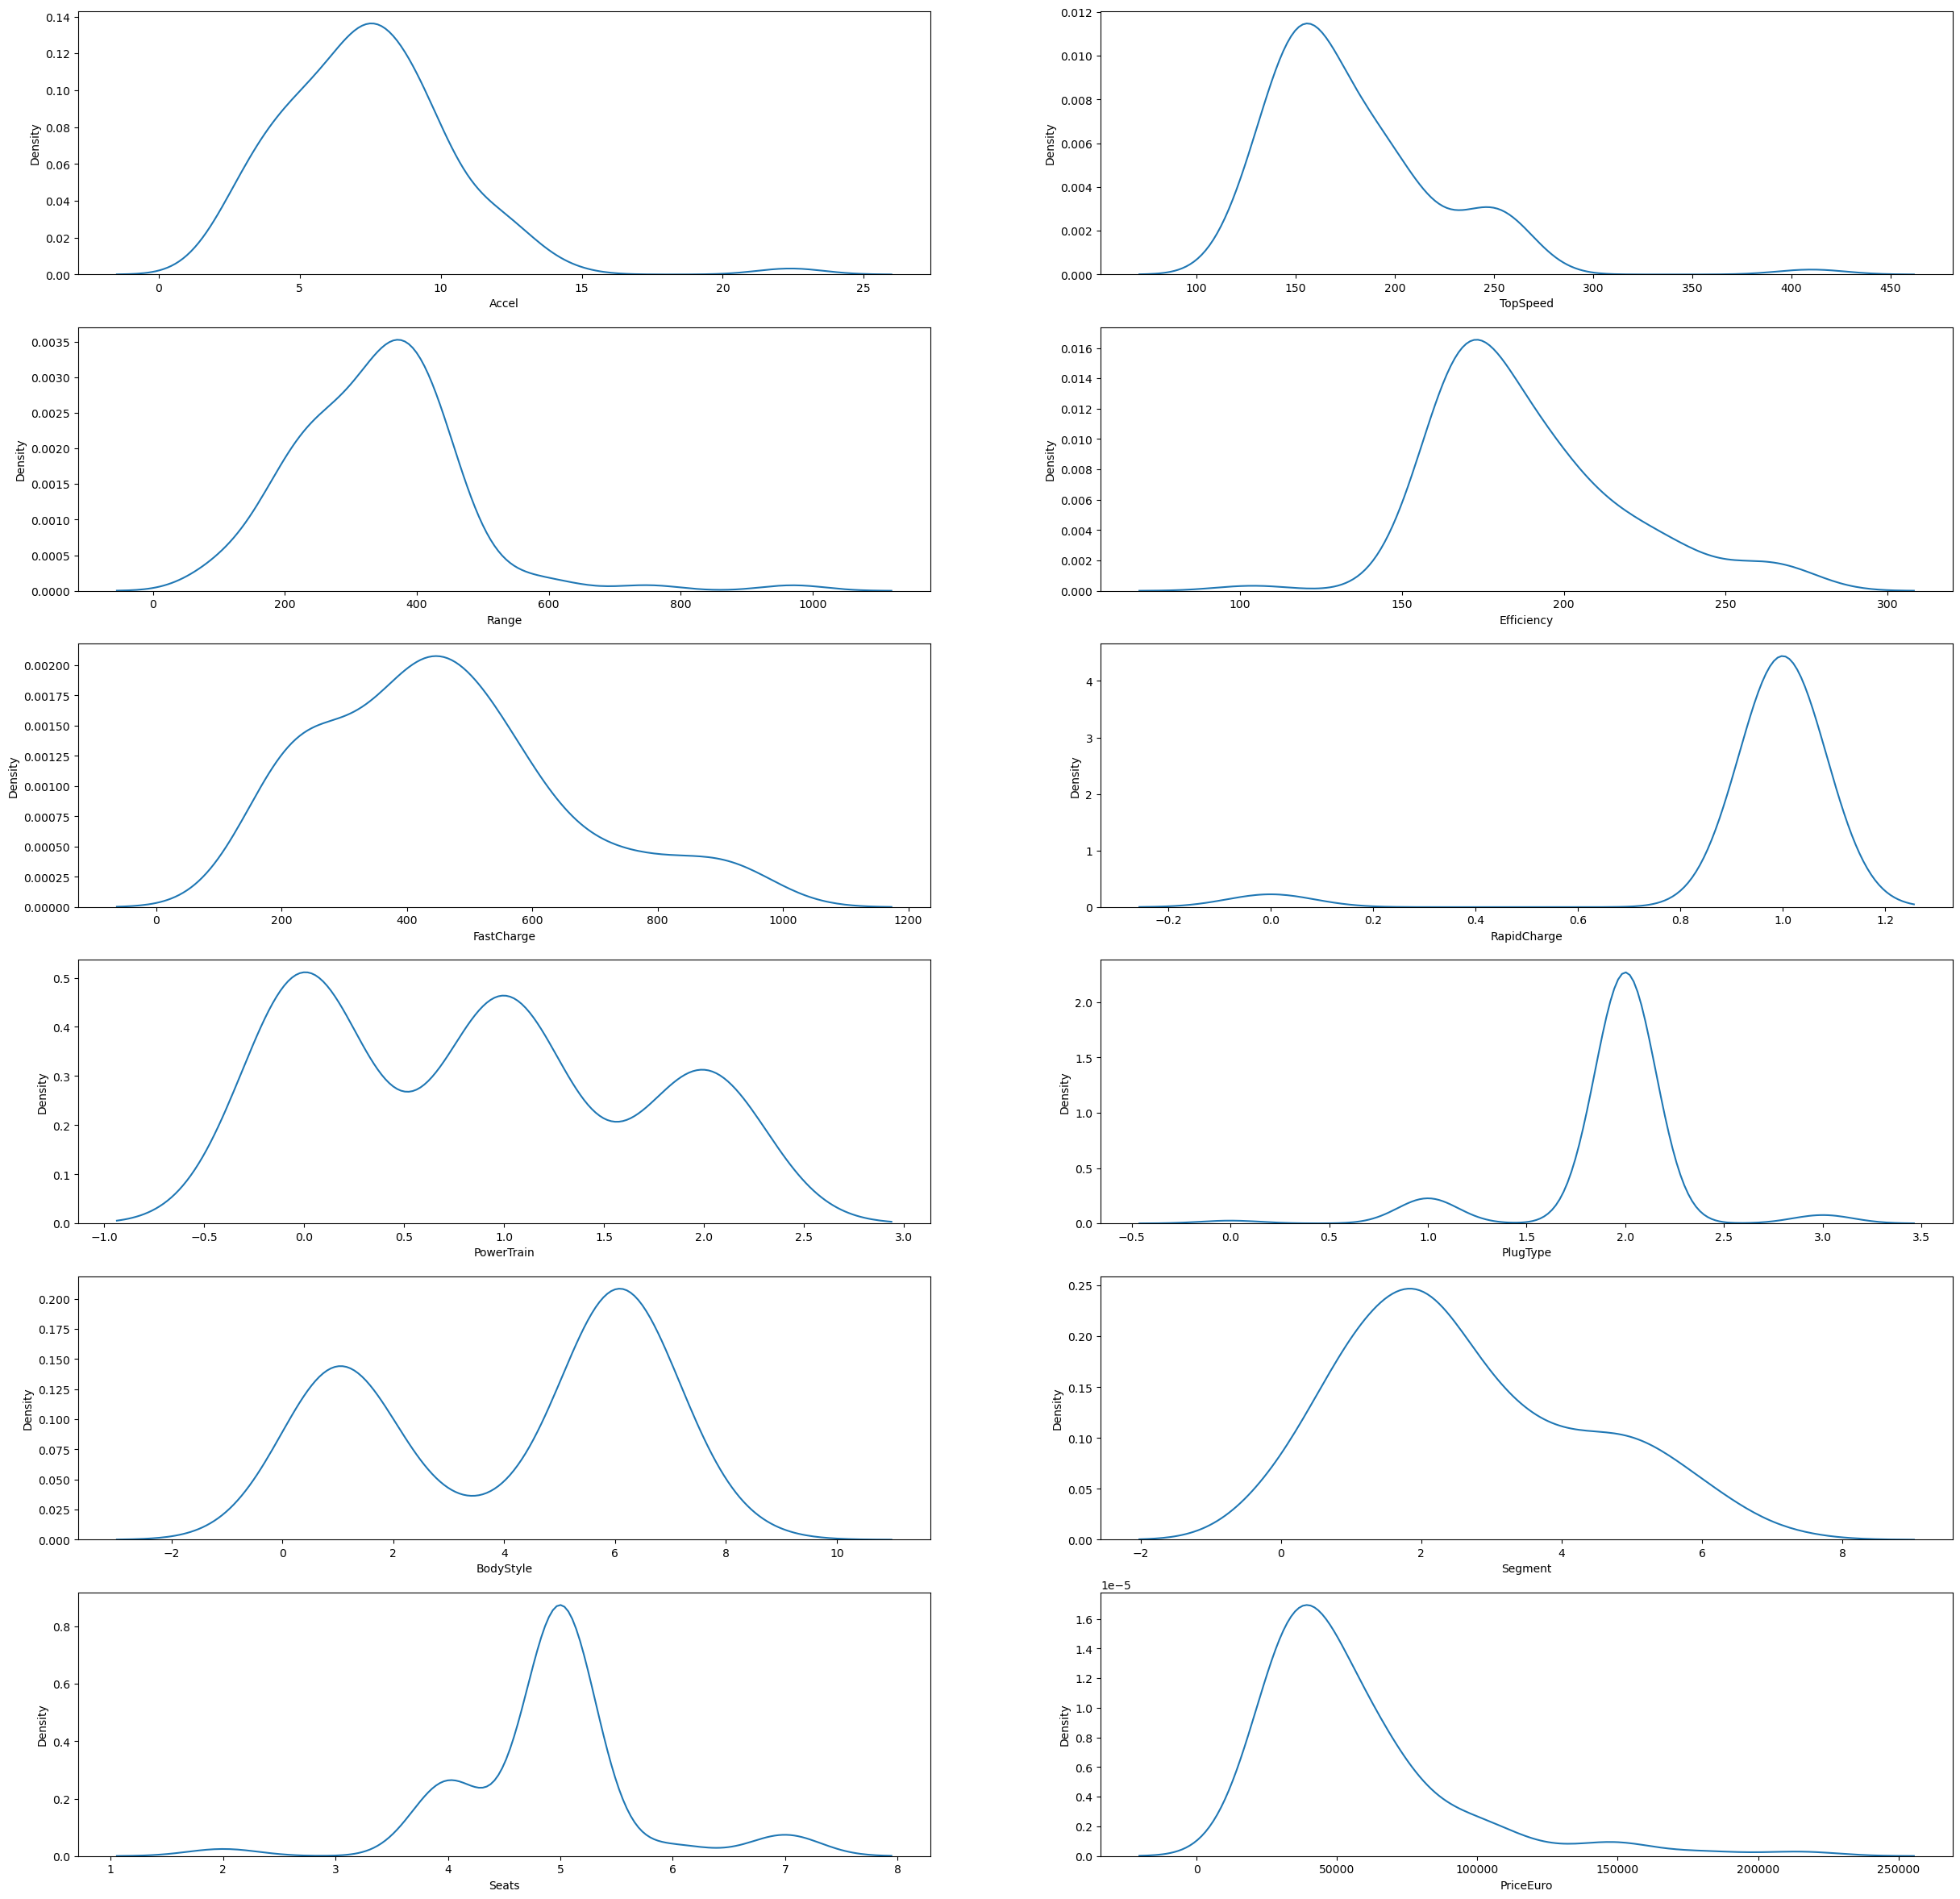

In [21]:
plt.figure(figsize=(30,45))
for i,col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax=plt.subplot(9,2,i+1)
        sns.kdeplot(df[col],ax=ax)
        plt.xlabel(col)
plt.show()

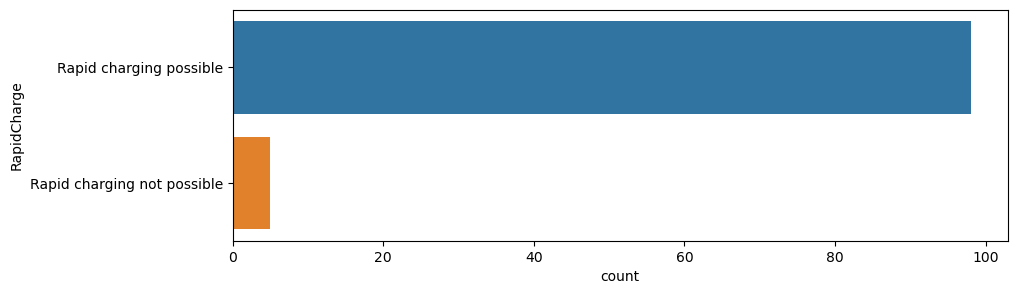

In [22]:
plt.figure(figsize=(10,3))
sns.countplot(y='RapidCharge',data=data)
plt.show()

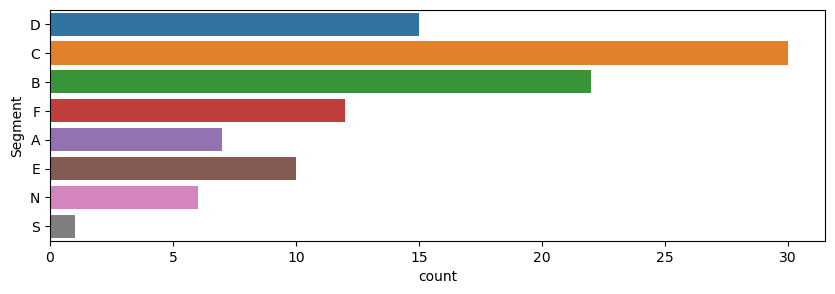

In [23]:
plt.figure(figsize=(10,3))
sns.countplot(y='Segment',data=data)
plt.show()

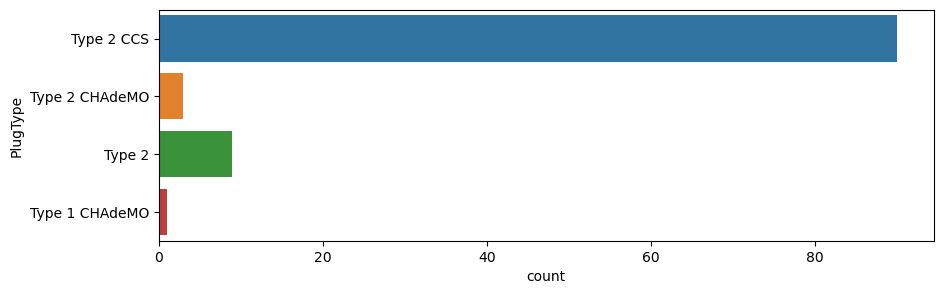

In [24]:
plt.figure(figsize=(10,3))
sns.countplot(y='PlugType',data=data)
plt.show()

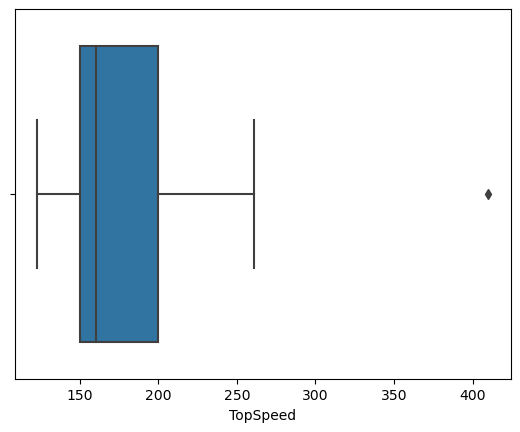

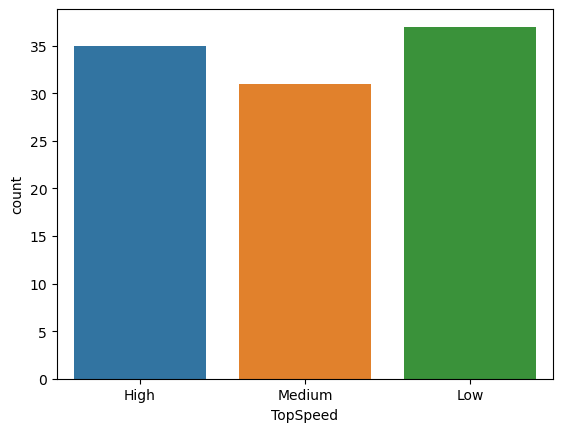

In [25]:
sns.boxplot(x=df['TopSpeed'])
plt.show()
def convert(x):
     if x<160:
       return "Low"
     elif x>=160 and x<190:
       return "Medium"
     else:
       return "High"
converted_TopSpeed=df['TopSpeed'].apply(convert)
sns.countplot(x=converted_TopSpeed)
plt.show()

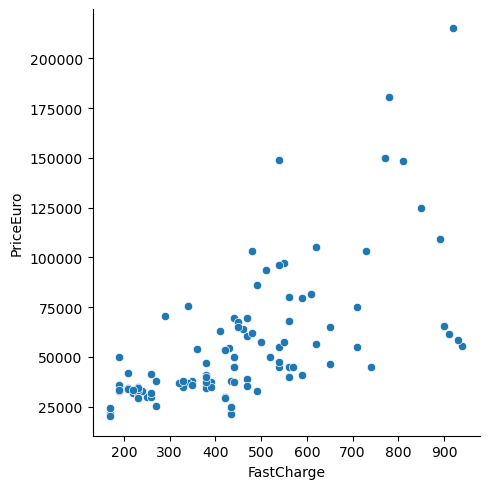

In [26]:
sns.relplot(x='FastCharge',y='PriceEuro',data=df)
plt.show()

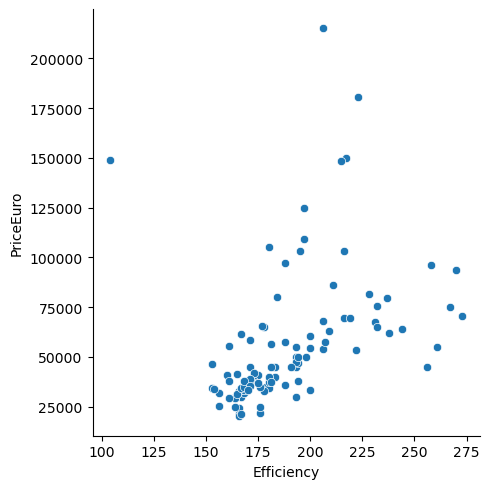

In [27]:
sns.relplot(x='Efficiency',y='PriceEuro',data=df)
plt.show()

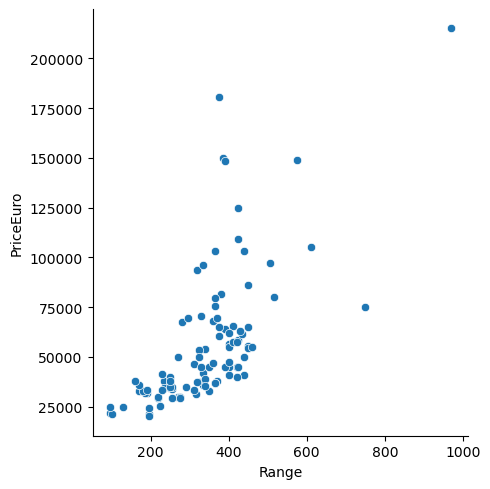

In [28]:
sns.relplot(x='Range',y='PriceEuro',data=df)
plt.show()

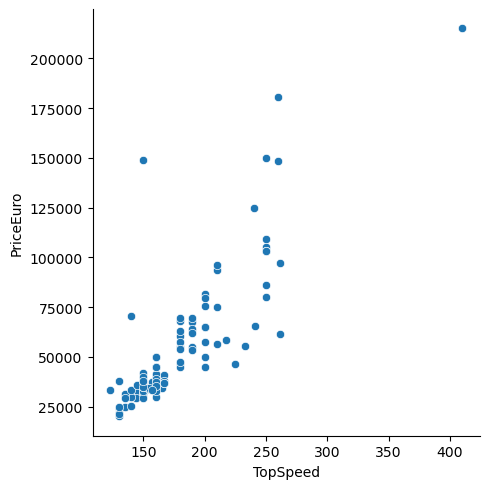

In [29]:
sns.relplot(x='TopSpeed',y='PriceEuro',data=df)
plt.show()

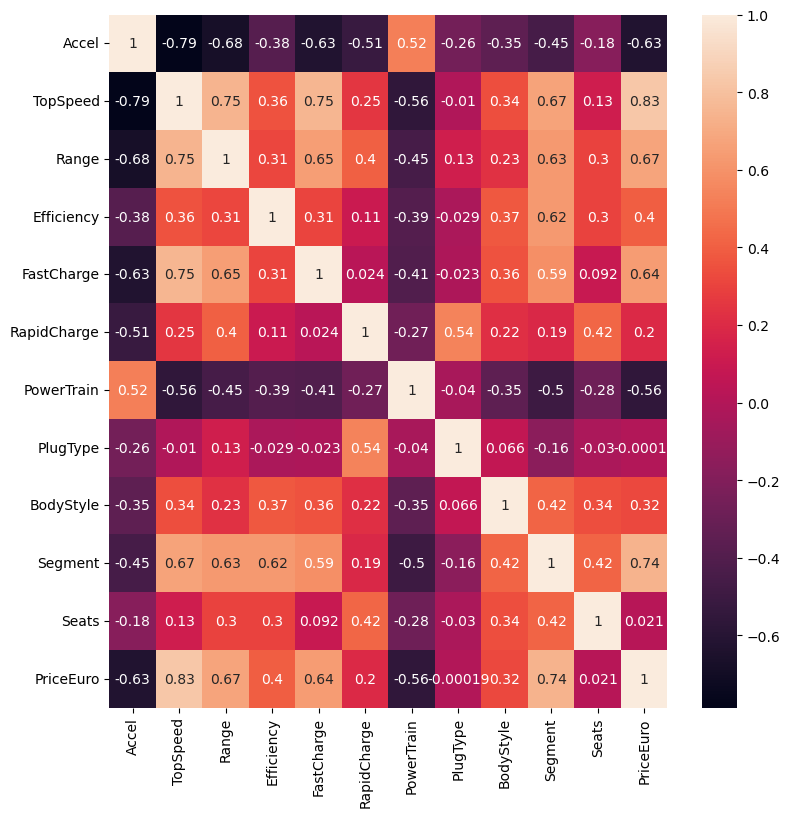

In [30]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Clustering using K-Means

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaling_list=['Accel','TopSpeed','Range','Efficiency','FastCharge']
for col in scaling_list:
    scaler.fit(df[[col]])
    df[col]=scaler.transform(df[[col]])
    
df.head()

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0.123153,0.383275,0.405714,0.337278,1.000000,1,0,2,7,3,5,55480
1,0.389163,0.128920,0.200000,0.372781,0.103896,1,2,2,1,2,5,30000
2,0.128079,0.303136,0.348571,0.455621,0.584416,1,0,2,2,3,5,56440
3,0.231527,0.198606,0.302857,0.603550,0.506494,1,2,2,6,3,5,68040
4,0.364532,0.076655,0.085714,0.378698,0.025974,1,2,2,1,1,4,32997


In [32]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [33]:
scaled_df=scalar.fit_transform(df)

In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principal_components=pca.fit_transform(scaled_df)
pca_df=pd.DataFrame(data=principal_components,columns=['PCA1','PCA2'])
pca_df

,PCA1,PCA2
0,2.401157,0.049816
1,-2.227012,-0.582372
2,1.250603,-0.144359
3,0.463784,-0.094295
4,-3.043646,-0.466813
...,...,...
98,-0.717185,-0.398149
99,2.579345,0.242274
100,0.259288,-0.353720
101,0.983751,-0.208357


D:\Users\manir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


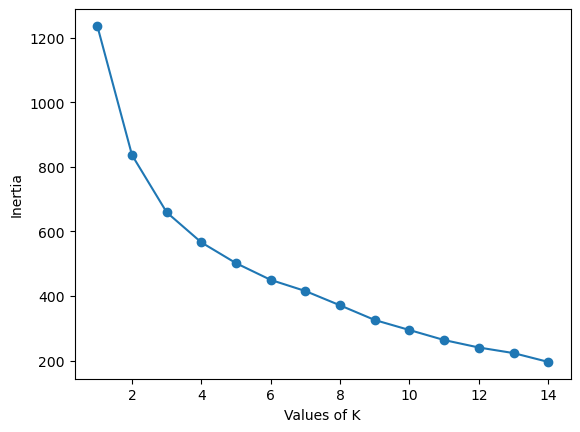

In [35]:
from sklearn.cluster import KMeans
k_rng=range(1,15)
inertia=[]
for k in k_rng:
    kmean=KMeans(n_clusters=k)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(k_rng,inertia,marker='o')
plt.xlabel('Values of K')
plt.ylabel("Inertia")
plt.show()

In [36]:
kmeans_model=KMeans(5)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans=pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

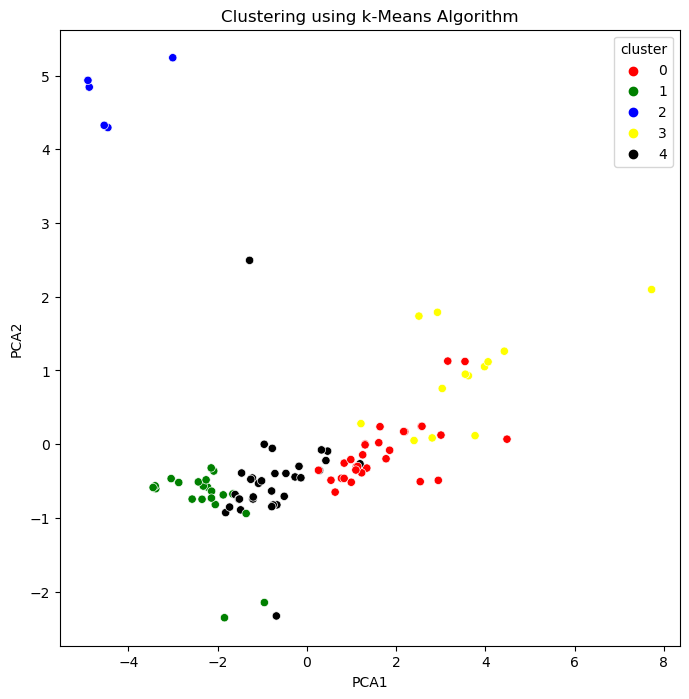

In [37]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x='PCA1',y='PCA2',hue='cluster',data=pca_df_kmeans,palette=['red','green','blue','yellow','black'])
plt.title("Clustering using k-Means Algorithm")
plt.show()

In [39]:
cluster_centers=pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
cluster_centers=scalar.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0.171100,0.255285,0.340190,0.680868,0.471861,1.000000e+00,0.100000,1.933333,5.133333,3.600000,5.433333,65793.533333
1,0.351321,0.080773,0.167792,0.360140,0.112751,1.000000e+00,1.227273,2.090909,1.090909,1.136364,4.545455,31892.772727
2,0.598030,0.027875,0.024000,0.422485,0.343588,-1.110223e-16,1.800000,1.000000,1.600000,1.200000,3.400000,26154.400000
3,0.086775,0.462611,0.456264,0.492490,0.765235,1.000000e+00,0.000000,1.846154,5.384615,4.846154,4.461538,121482.230769
4,0.299746,0.138739,0.265108,0.455801,0.300275,1.000000e+00,1.454545,1.969697,4.969697,2.060606,5.000000,41306.151515


In [40]:
cluster_df=pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Cluster
0,0.123153,0.383275,0.405714,0.337278,1.000000,1,0,2,7,3,5,55480,3
1,0.389163,0.128920,0.200000,0.372781,0.103896,1,2,2,1,2,5,30000,1
2,0.128079,0.303136,0.348571,0.455621,0.584416,1,0,2,2,3,5,56440,0
3,0.231527,0.198606,0.302857,0.603550,0.506494,1,2,2,6,3,5,68040,4
4,0.364532,0.076655,0.085714,0.378698,0.025974,1,2,2,1,1,4,32997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.266010,0.128920,0.268571,0.514793,0.350649,1,1,2,1,2,5,45000,4
99,0.118227,0.303136,0.274286,0.911243,0.480519,1,0,2,6,4,5,96050,0
100,0.187192,0.268293,0.262857,0.532544,0.350649,1,0,2,1,2,5,50000,0
101,0.147783,0.268293,0.320000,0.757396,0.363636,1,0,2,1,2,5,65000,0


<AxesSubplot:xlabel='Cluster', ylabel='count'>

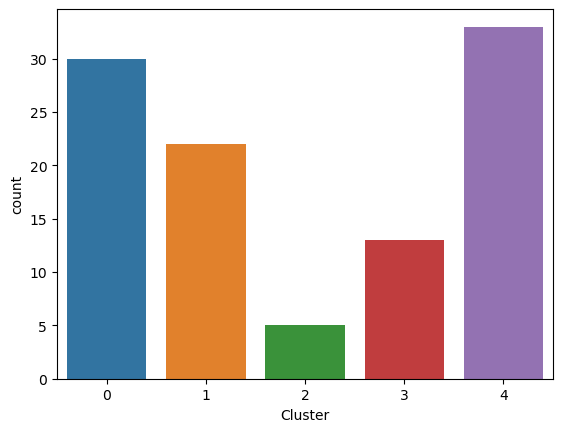

In [43]:
sns.countplot(x='Cluster',data=cluster_df)

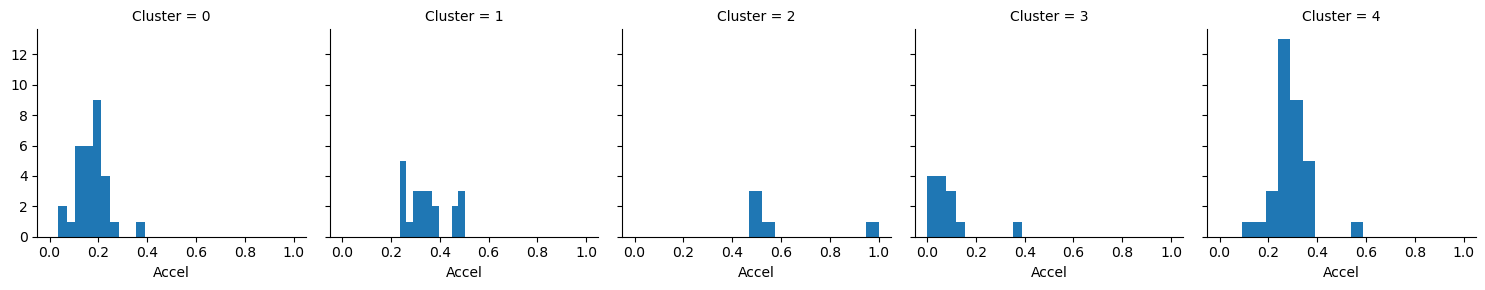

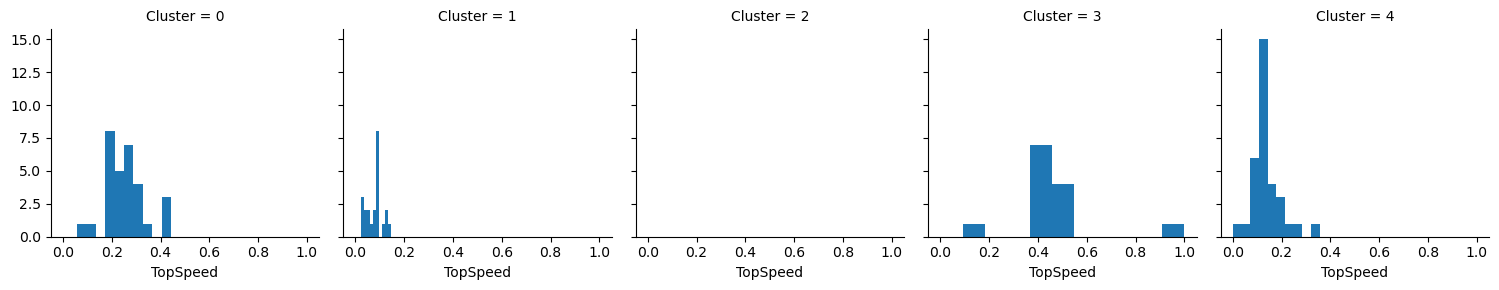

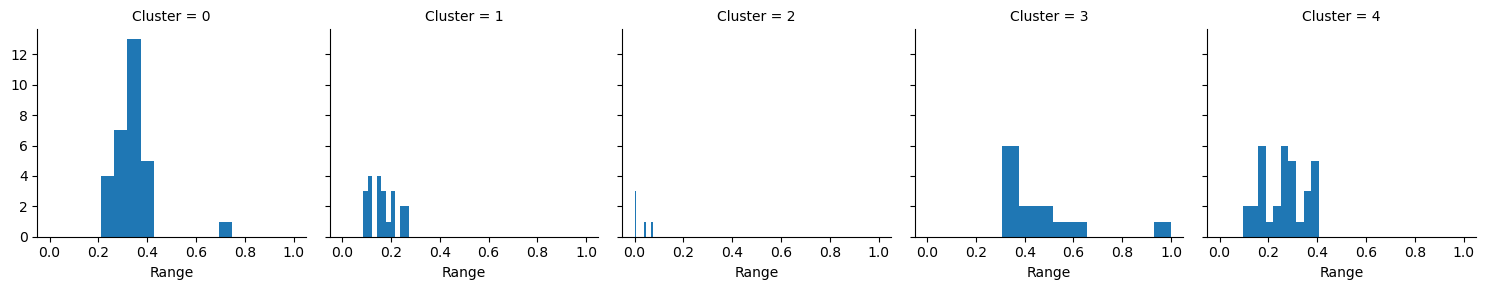

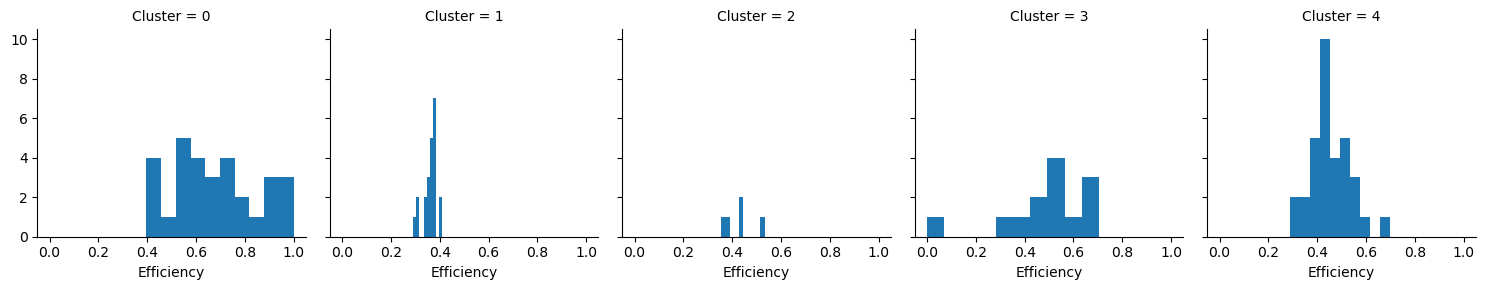

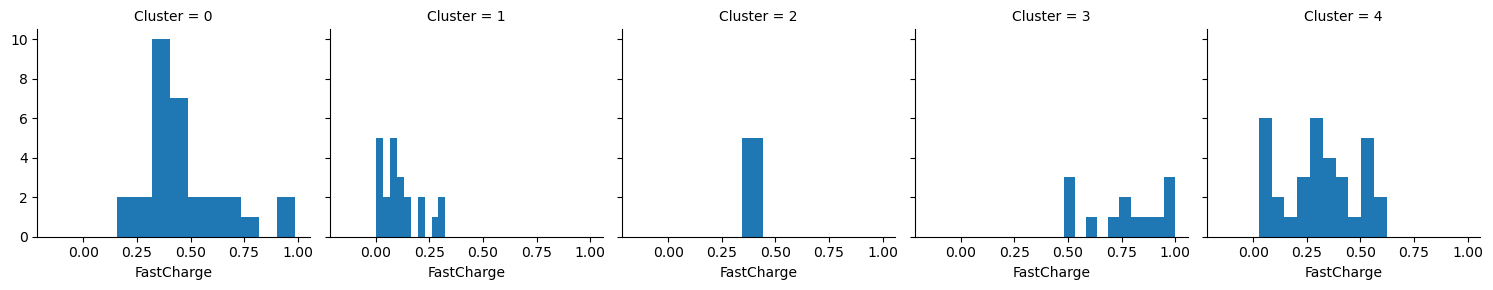

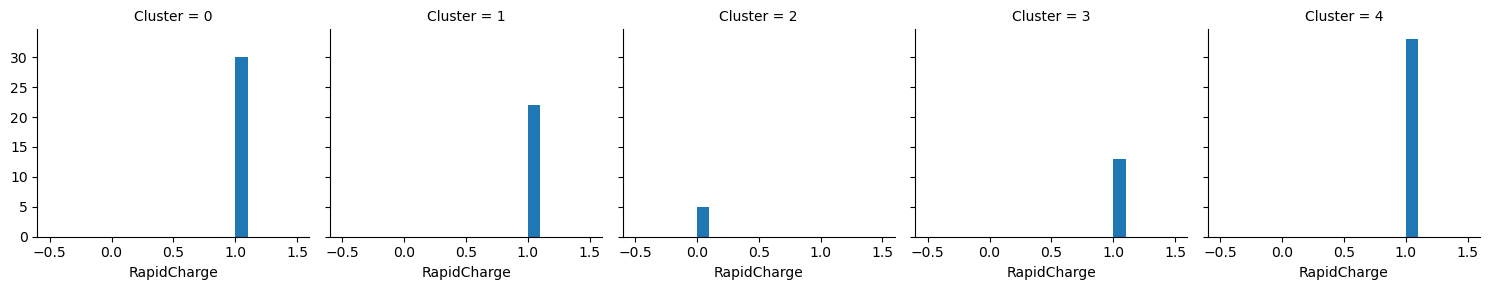

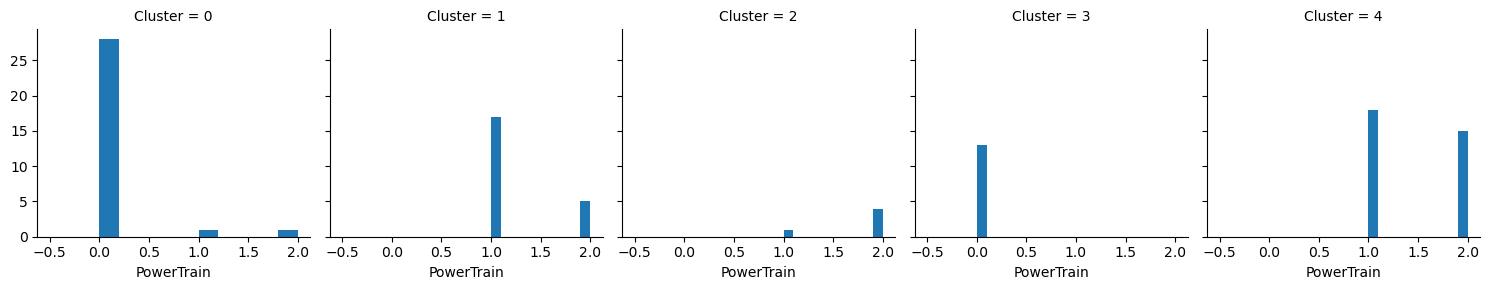

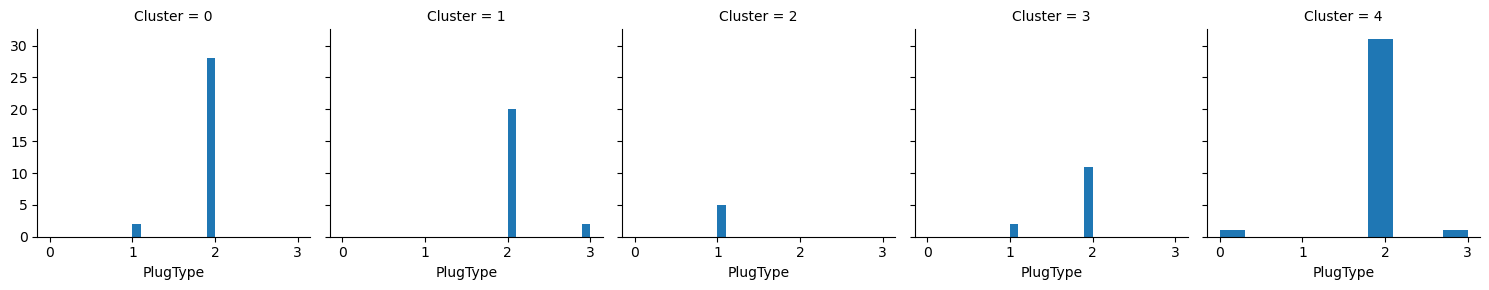

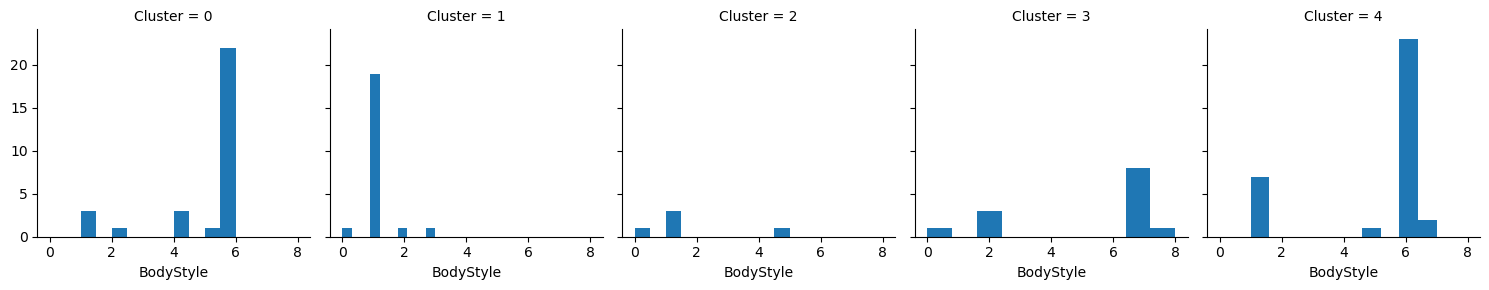

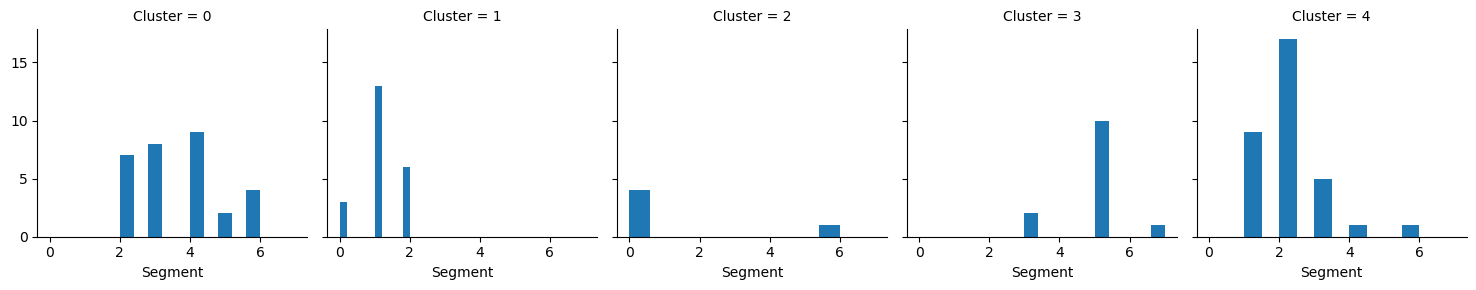

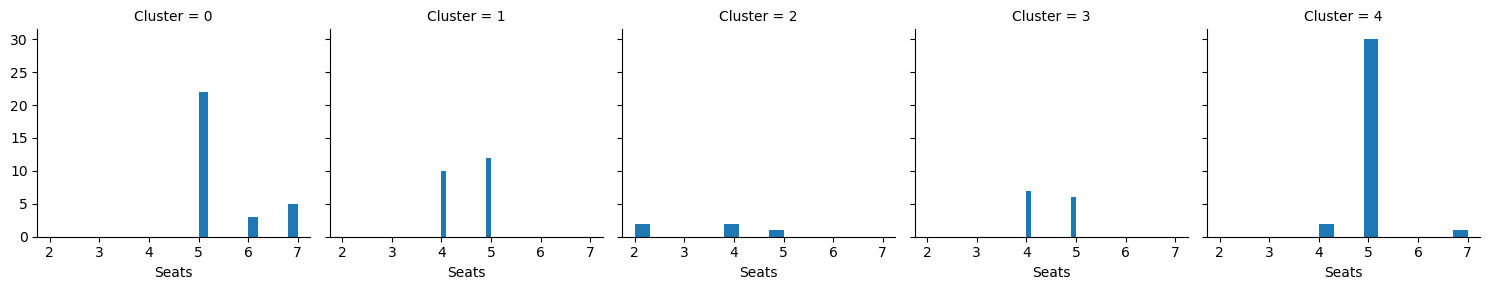

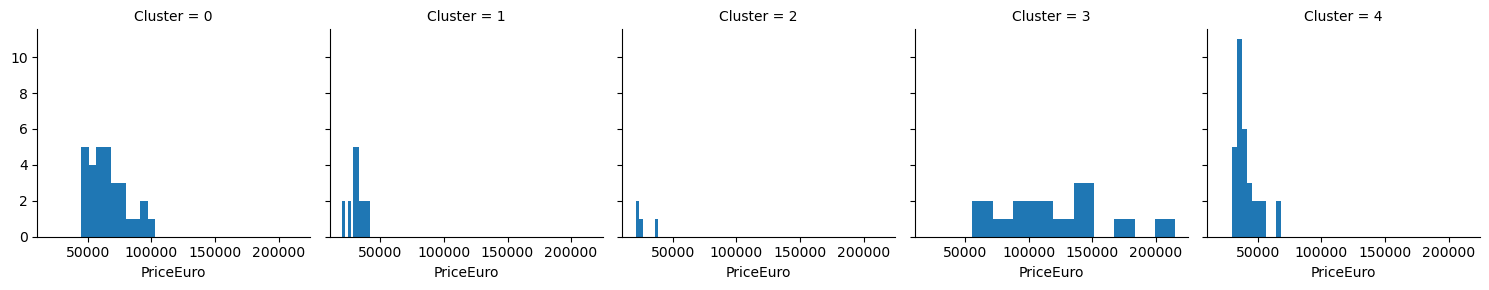

In [44]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid=sns.FacetGrid(cluster_df,col='Cluster')
    grid=grid.map(plt.hist,c)
plt.show()